In [1]:
import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    after_stat,
    geom_histogram,
    geom_vline,
    facet_wrap,
    facet_grid,
    coord_flip,
    scale_y_continuous,
    scale_y_sqrt,
    scale_y_log10,
    scale_fill_manual,
    theme_bw,
    theme_xkcd,
    scale_color_manual,
    labs
)
from plotnine.data import diamonds
from mizani.formatters import percent_format


## Histograms

Visualise the distribution of a variable by dividing the x-axis into bins and counting the number of observations in each bin. Histograms display the counts with bars.

You can define the number of bins (e.g. divide the data five bins) or define the binwidth (e.g. each bin is size 10).

Distributions can be visualised as:
* count,
* normalised count,
* density,
* normalised density,
* scaled density as a percentage.

In [2]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


If you create a basic histogram, you will be prompted to define the binwidth or number of bins.

/opt/homebrew/Caskroom/miniforge/base/envs/plotnine/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 142'. Pick better value with 'binwidth'.


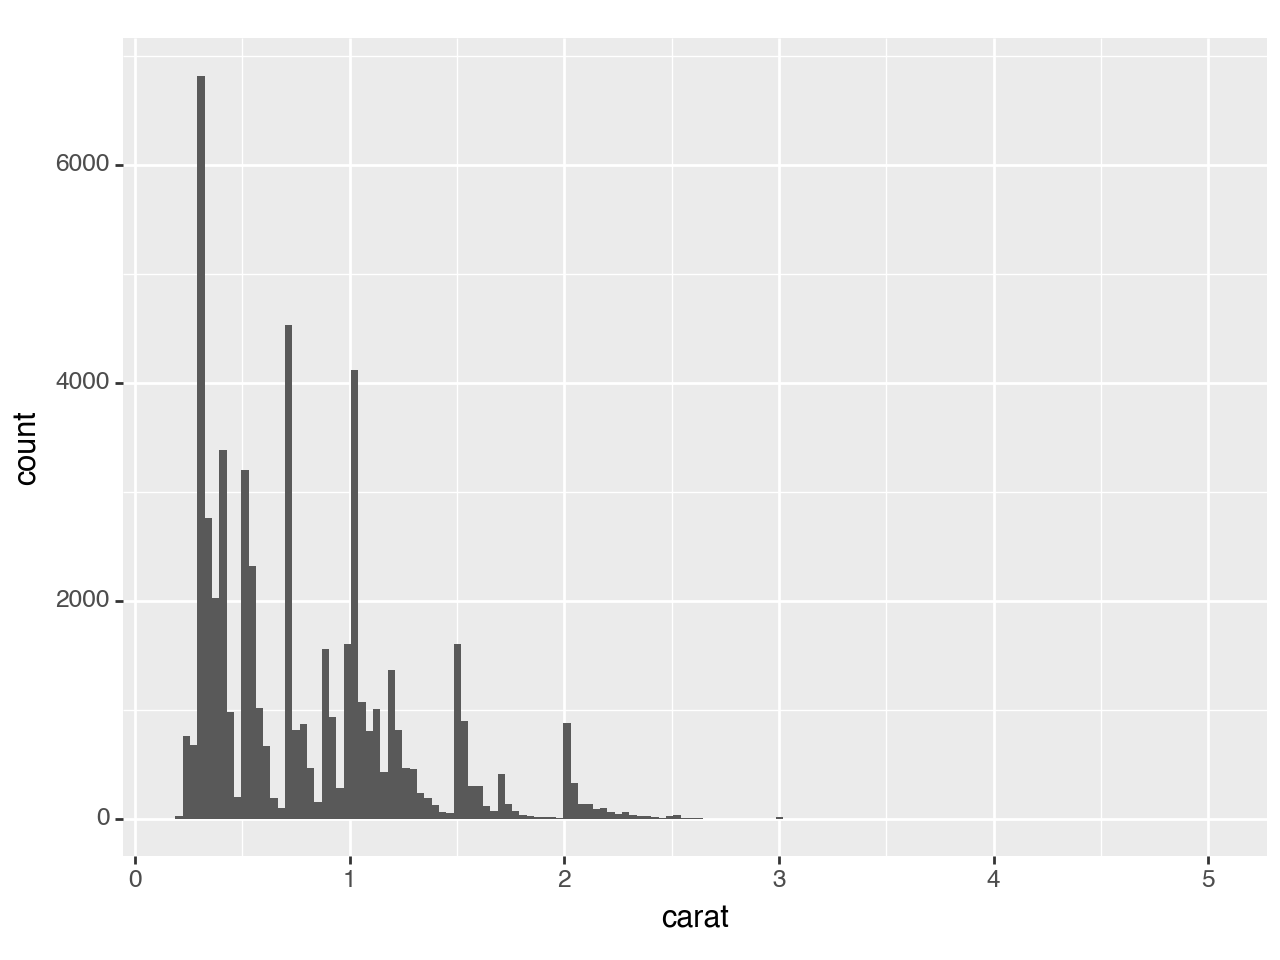

<Figure Size: (640 x 480)>

In [3]:
(
    ggplot(diamonds, aes(x='carat')) 
    + geom_histogram()
)

You can define the width of the bins, by specifying the `binwidth` inside `geom_histogram()`.

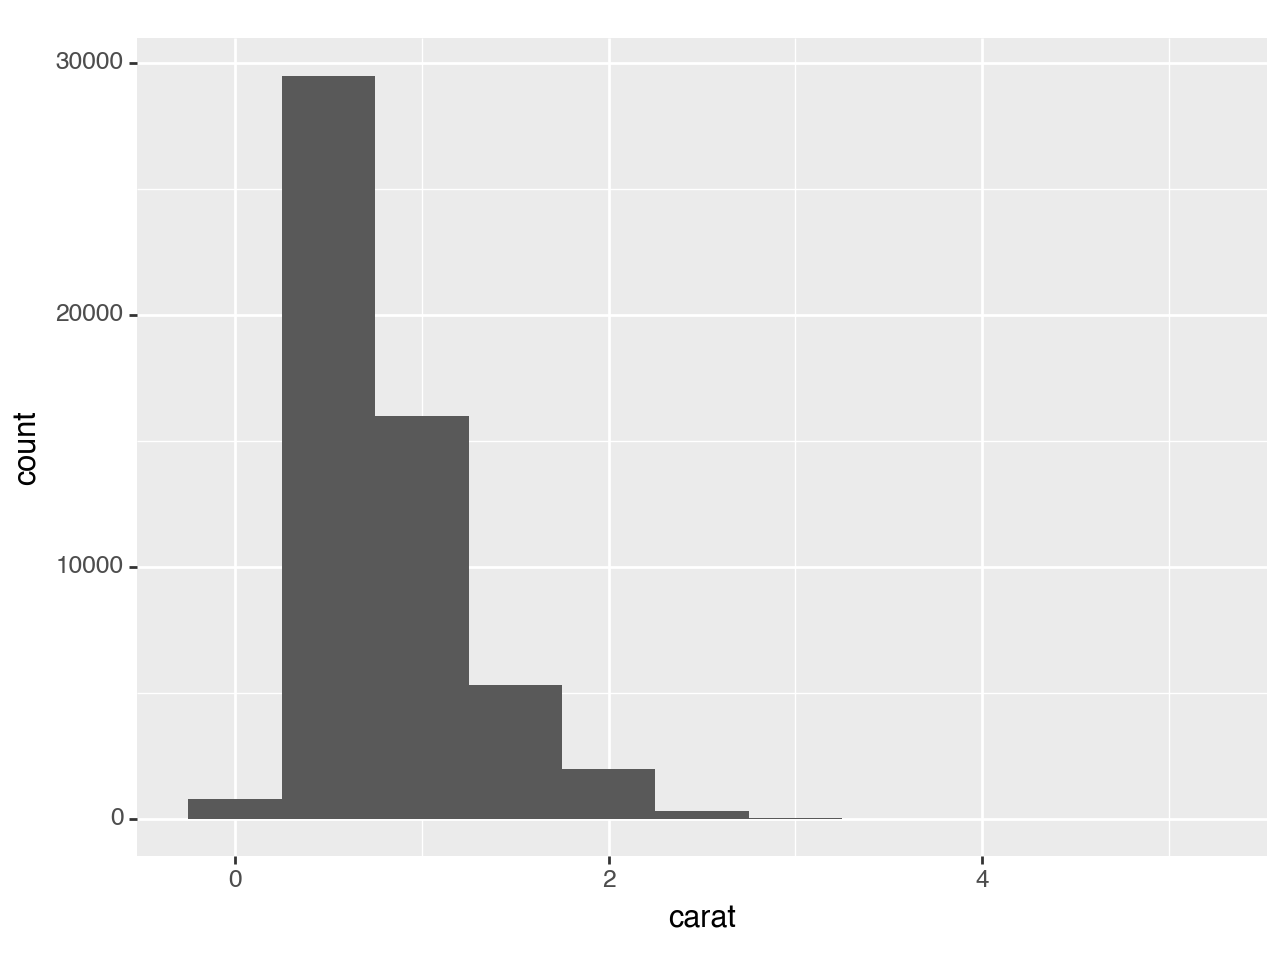

<Figure Size: (640 x 480)>

In [4]:
(
    ggplot(diamonds, aes(x='carat')) 
    + geom_histogram(binwidth=0.5) # specify the binwidth
)

Or you can define the number of bins by specifying `bins` inside `geom_histogram()`. Note, the example below uses 10 bins, however you can't see them all because some of the bins are too small to be noticeable.

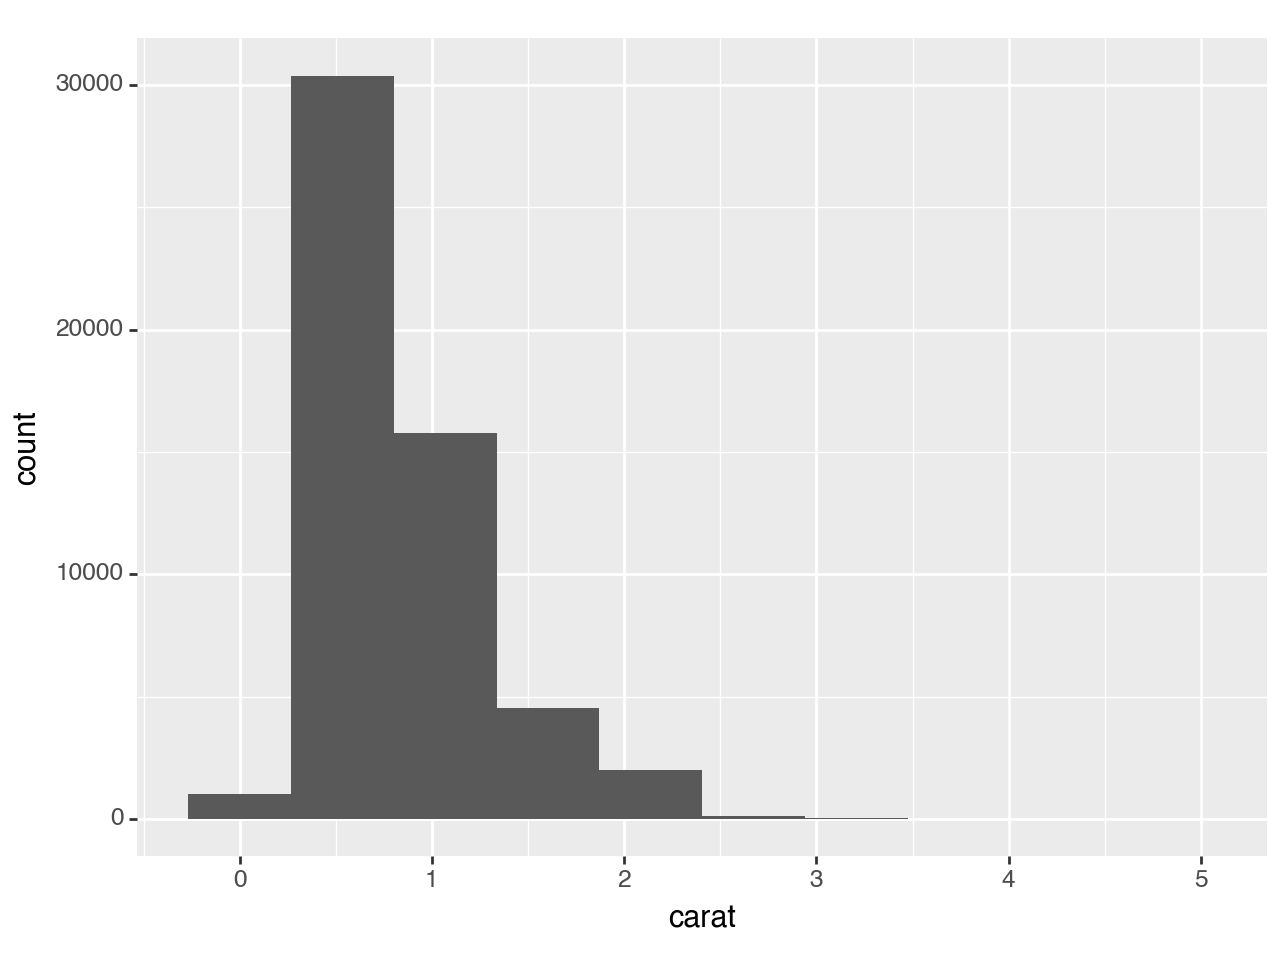

<Figure Size: (640 x 480)>

In [5]:
(
    ggplot(diamonds, aes(x='carat')) 
    + geom_histogram(bins=10) # specify the number of bins
)

There are different ways to visualise the distribution, you can specify this using the `y` argument within `aes()`. In the example below I'm using the default setting: raw count with `after_stat('count')`.

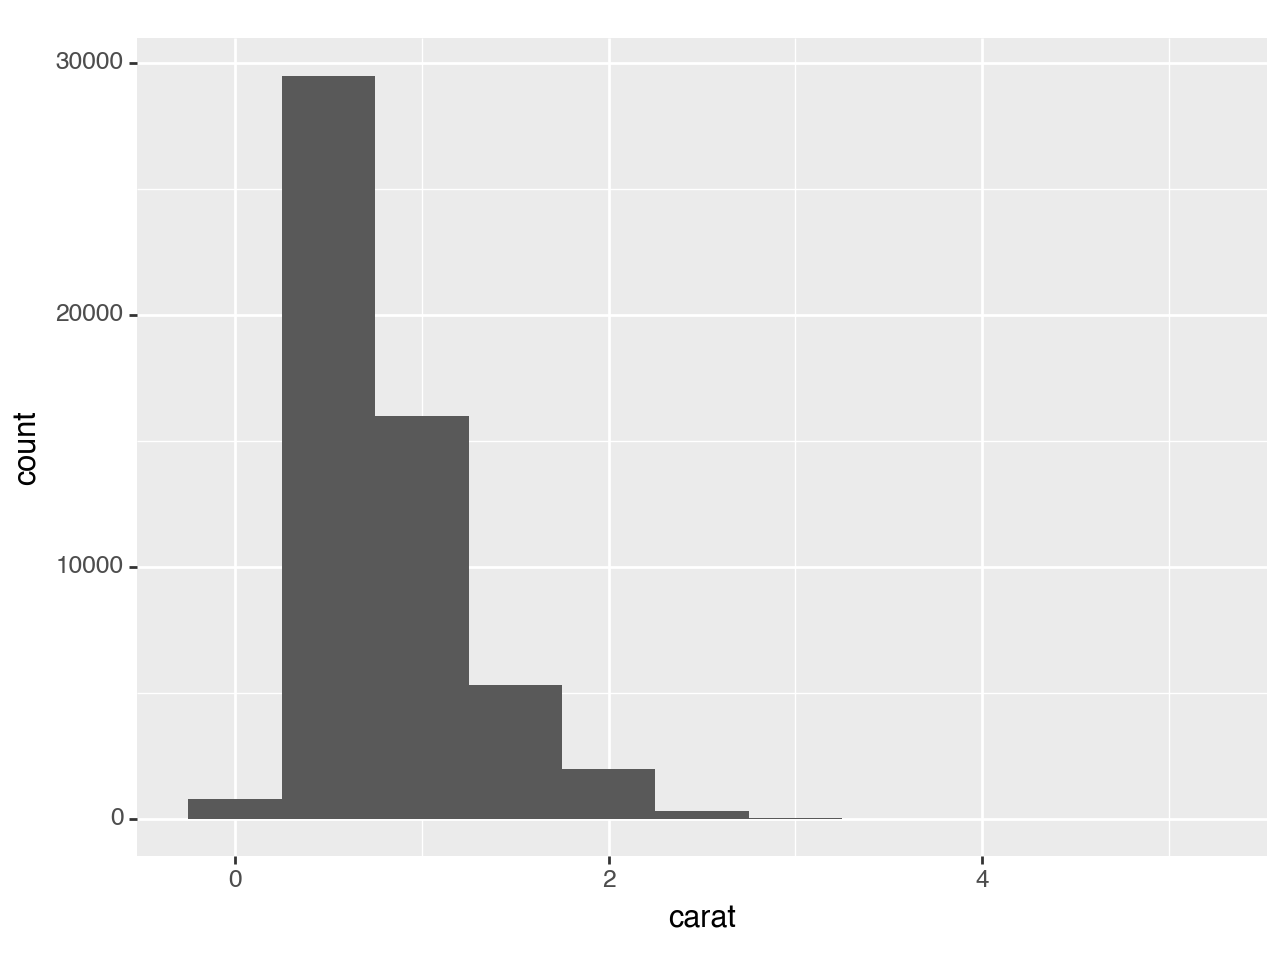

<Figure Size: (640 x 480)>

In [6]:
(
    ggplot(diamonds, aes(x='carat',
                         y=after_stat('count') # specify each bin is a count
                        )) 
    + geom_histogram(binwidth=0.50)  
)

You can normalise the raw count to 1 by using `after_stat('ncount')`:

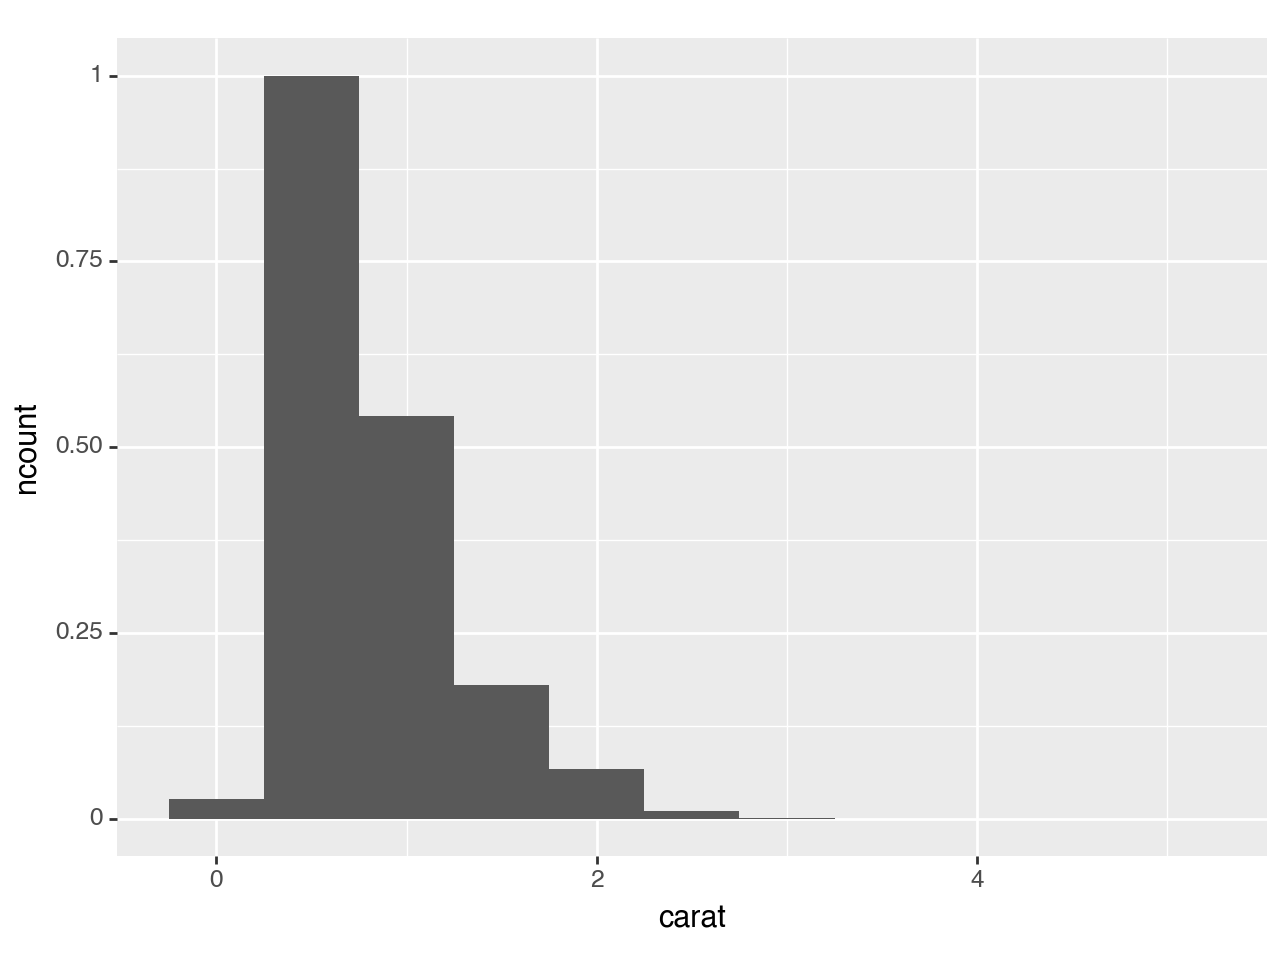

<Figure Size: (640 x 480)>

In [7]:
(
    ggplot(diamonds, aes(x='carat',
                         y=after_stat('ncount') # normalise the count to 1
                        )) 
    + geom_histogram(binwidth=0.50)  
)

You can display the density of points in a bin, (this is scaled to integrate to 1) by using `after_stat('density')`:

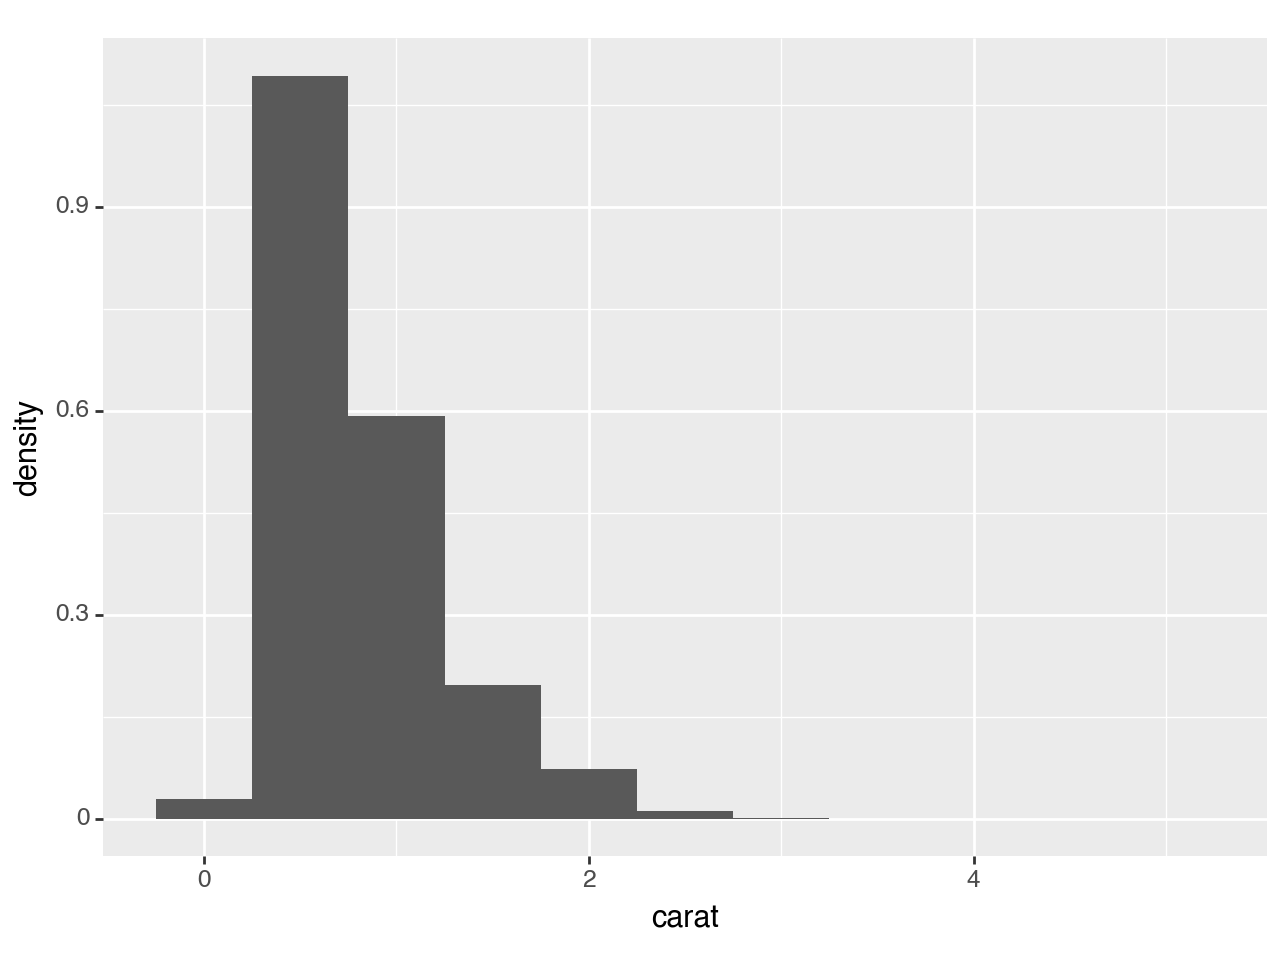

<Figure Size: (640 x 480)>

In [8]:
(
    ggplot(diamonds, aes(x='carat',
                         y=after_stat('density') # density
                        )) 
    + geom_histogram(binwidth=0.50)  
)

The proportion of bins can be shown, in the example below the `bin=0.5` accounts for about ~55% of the data:

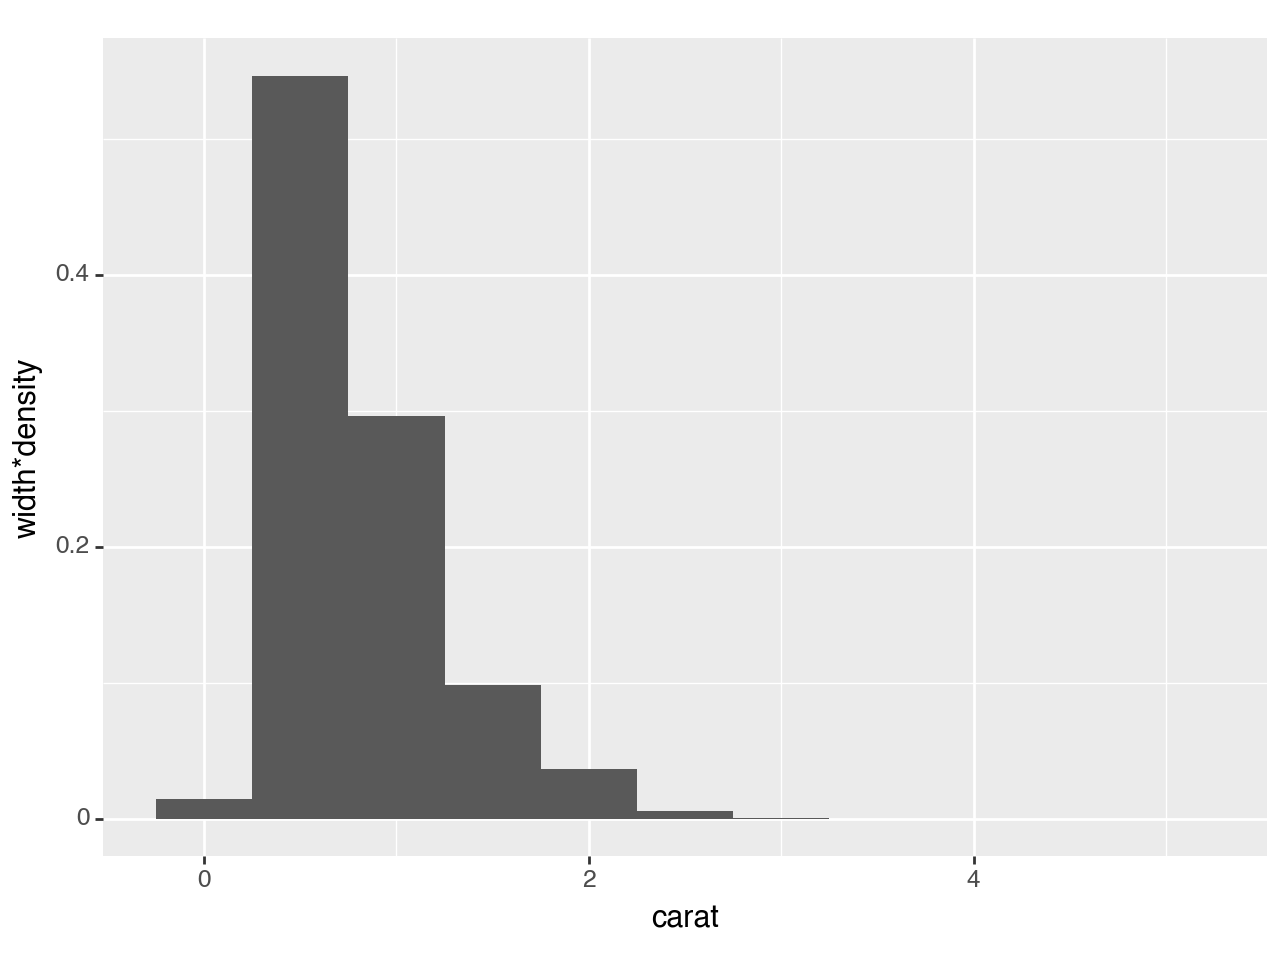

<Figure Size: (640 x 480)>

In [9]:
(
    ggplot(diamonds, aes(x='carat',
                         y=after_stat('width*density')) # show proportion
          ) 
    + geom_histogram(binwidth=0.5)
)

We can also display counts as percentages by using the `percent_format()` which requires the `mizani.formatters` library:

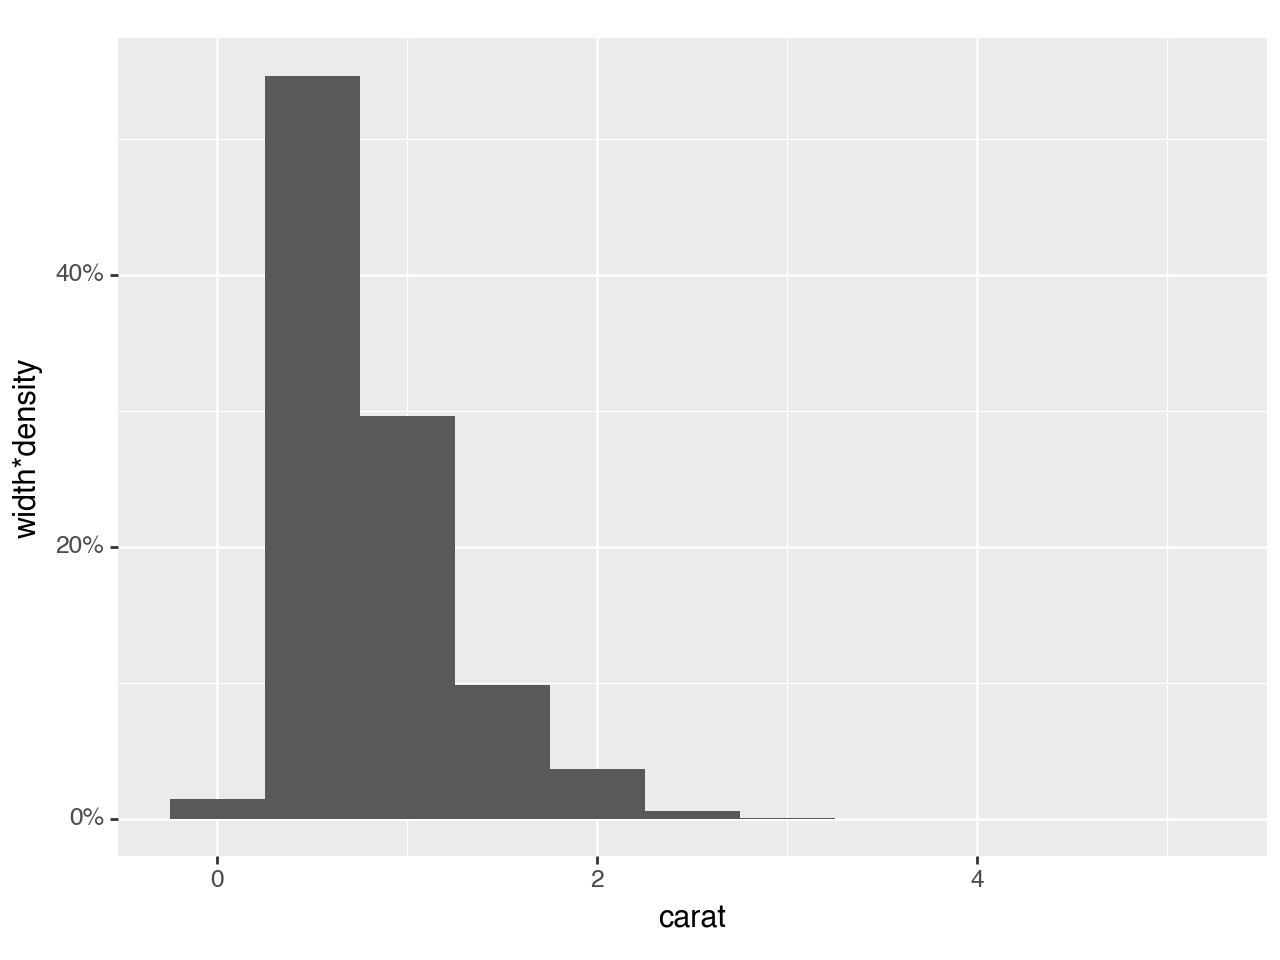

<Figure Size: (640 x 480)>

In [10]:
(
    ggplot(diamonds, aes(x='carat', y=after_stat('width*density'))) 
    + geom_histogram(binwidth=0.5)
    + scale_y_continuous(labels=percent_format()) # display labels as a percentage
)

Instead of using `stat` you can use `stat_bin` defined within `geom_histogram()`, this is useful if you want to layer a few different plots in the one figure.

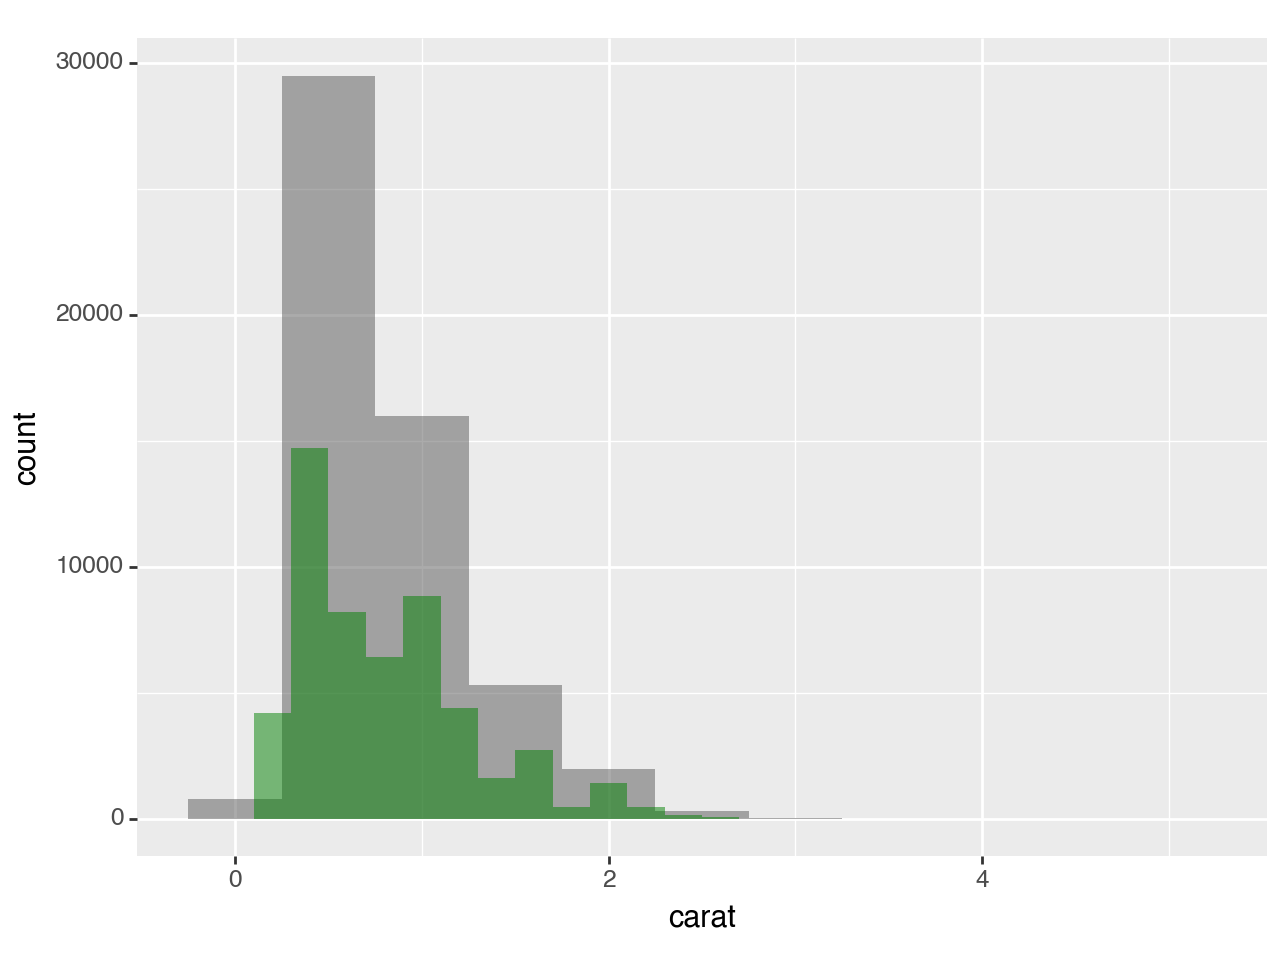

<Figure Size: (640 x 480)>

In [11]:
(
    ggplot(diamonds, aes(x='carat'))
    + geom_histogram(binwidth=0.5, alpha=0.5)
    + geom_histogram(binwidth=0.2, alpha=0.5, fill='green')
)

You can also flip the x-y coordinates:

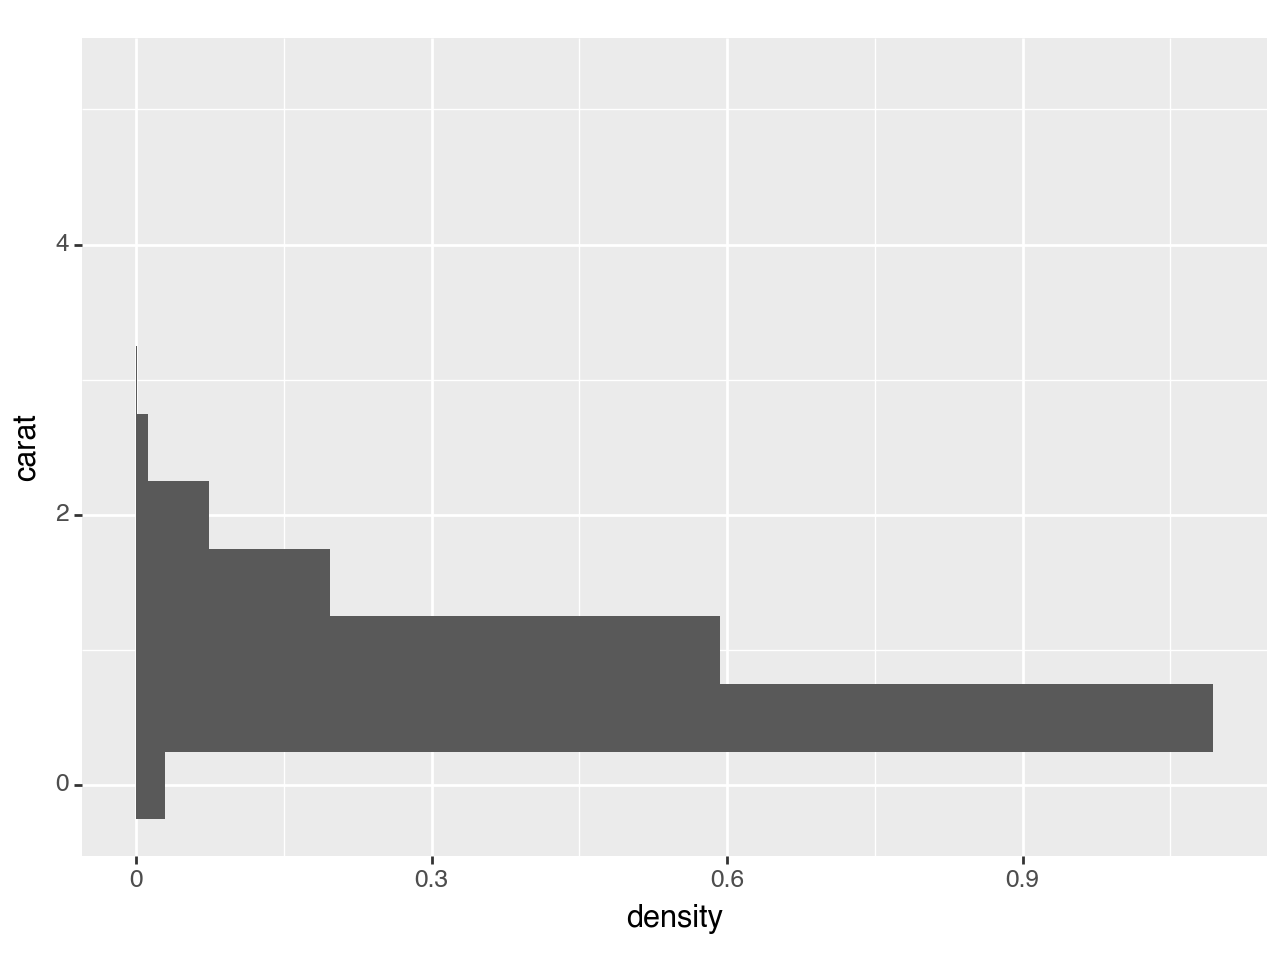

<Figure Size: (640 x 480)>

In [12]:
(
    ggplot(diamonds, aes(x='carat', y=after_stat('density'))) 
    + geom_histogram(binwidth=0.5)
    + coord_flip()
)

You can visualise counts by other variables using `fill` within `aes()`:

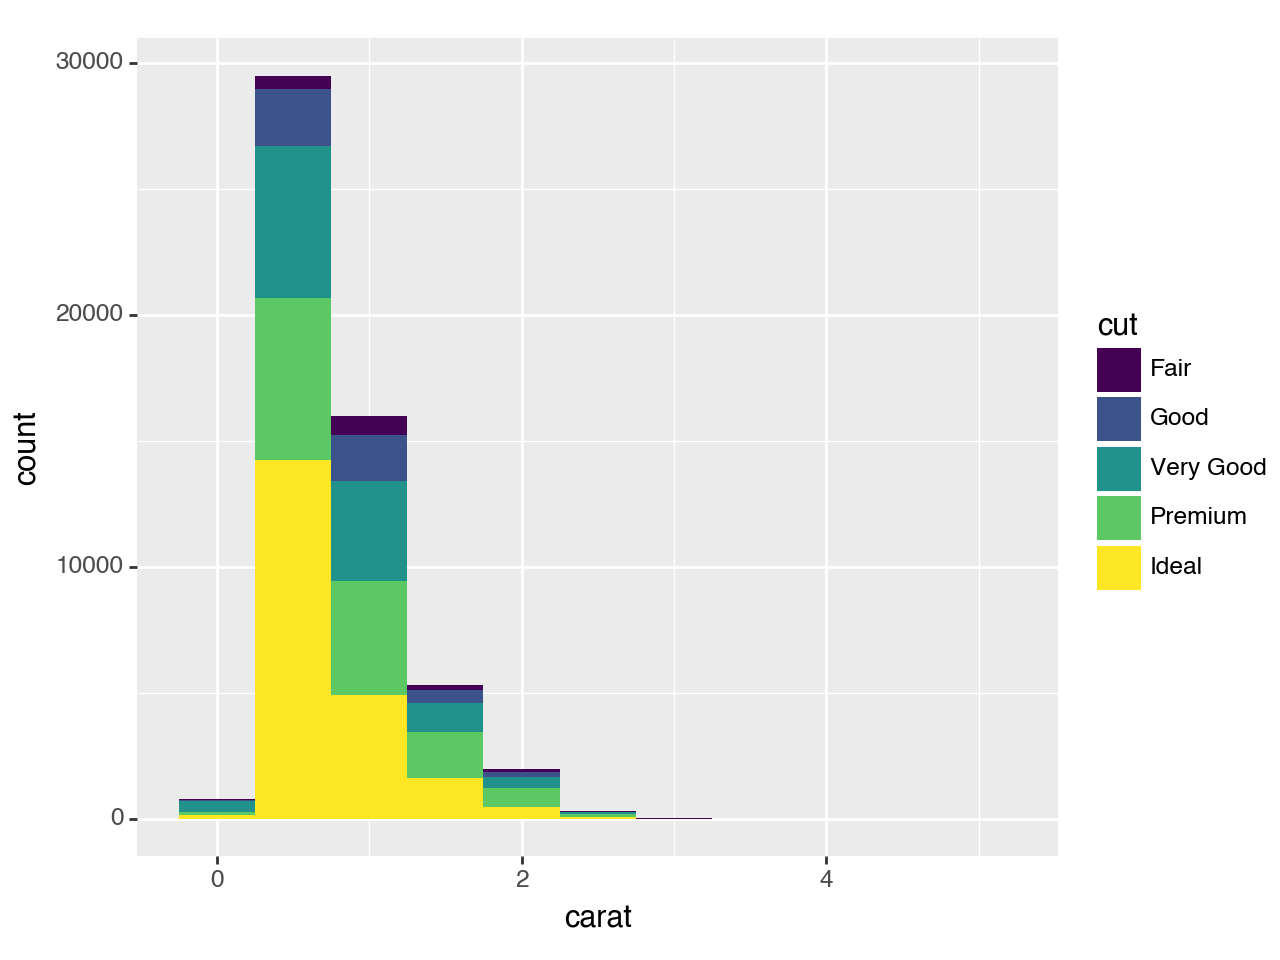

<Figure Size: (640 x 480)>

In [13]:
(
    ggplot(diamonds, aes(x='carat', y=after_stat('count'),fill='cut')) 
    + geom_histogram(binwidth=0.5)
)

You can visualise too-small-to-see bars by transforming the y-axis scaling by using `scale_y_sqrt()` square-root scale or `scale_y_log10()` for a log-scale (similarly use `scale_x_sqrt()` and `scale_x_log10()` to transform the x-axis).

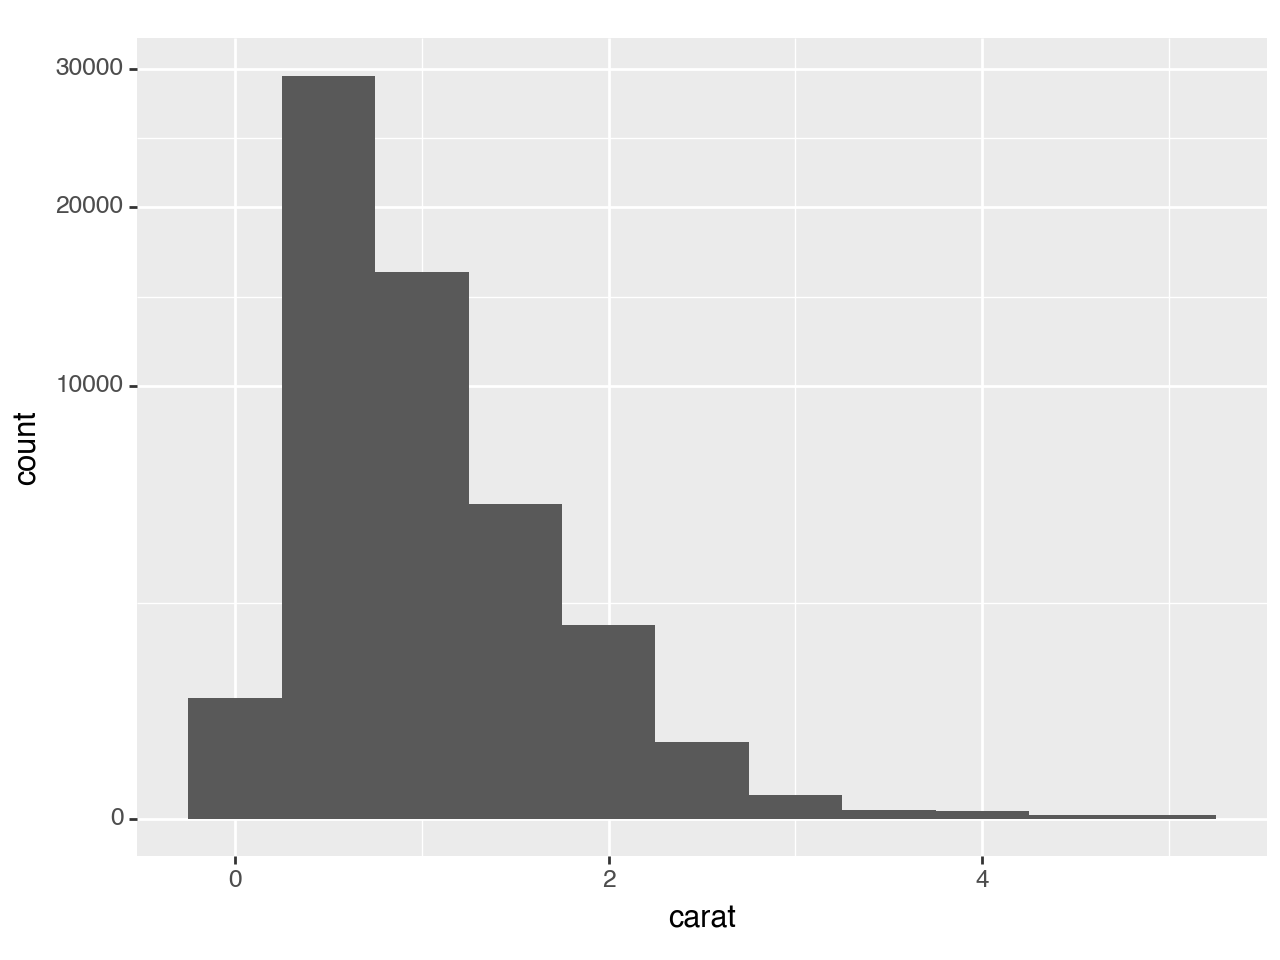

<Figure Size: (640 x 480)>

In [14]:
(
    ggplot(diamonds, aes(x='carat', y=after_stat('count'))) 
    + geom_histogram(binwidth=0.5)
    + scale_y_sqrt() # square root scale
)

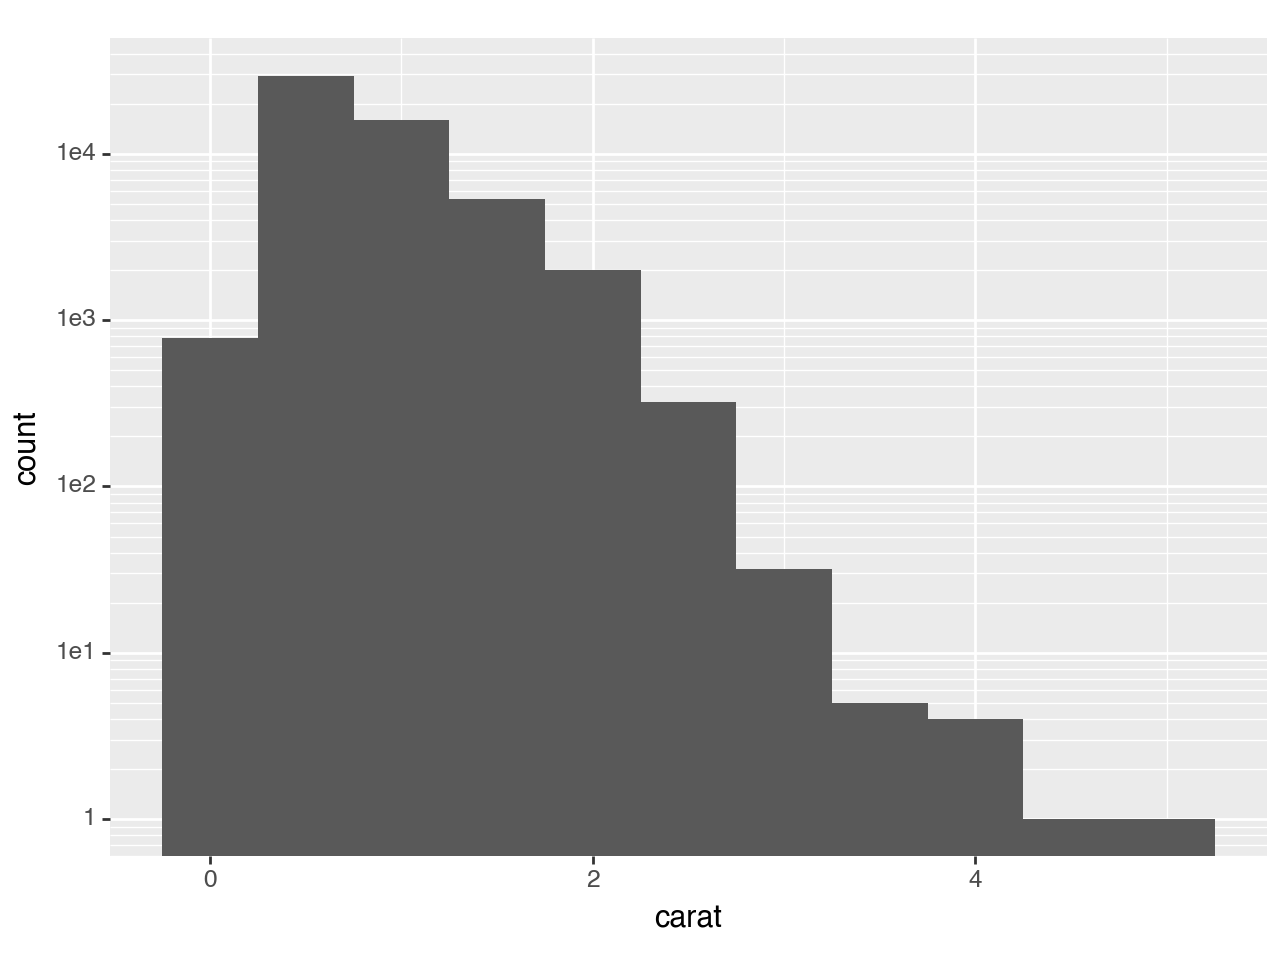

<Figure Size: (640 x 480)>

In [15]:
(
    ggplot(diamonds, aes(x = 'carat', y = after_stat('count'))) 
    + geom_histogram(binwidth = 0.5)
    + scale_y_log10() # log scale
)

Change the look of your plot:

findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font

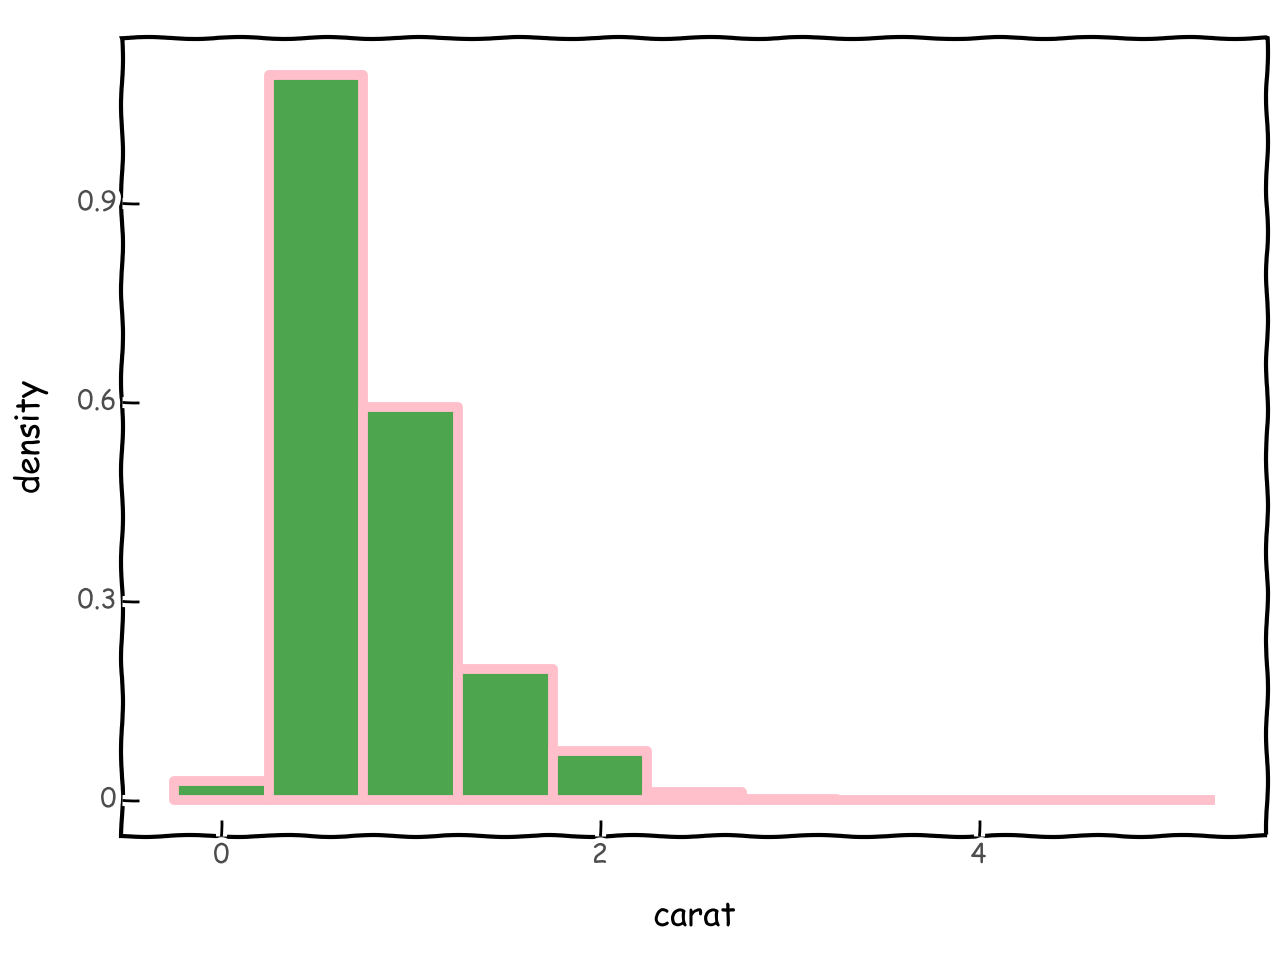

<Figure Size: (640 x 480)>

In [16]:
(
    ggplot(diamonds, aes(x='carat', y=after_stat('density')))
    + geom_histogram(binwidth=0.5,
                    fill='green',  # change the fill colour (one colour)
                    colour='pink', # change the outline
                    size=2,        # change the thickness of the outline
                    alpha=0.7      # change the transparency 
                    )
    + theme_xkcd()                 # play with themes (look/arrangement)
)

Another change, this time changing the fill colours manually:

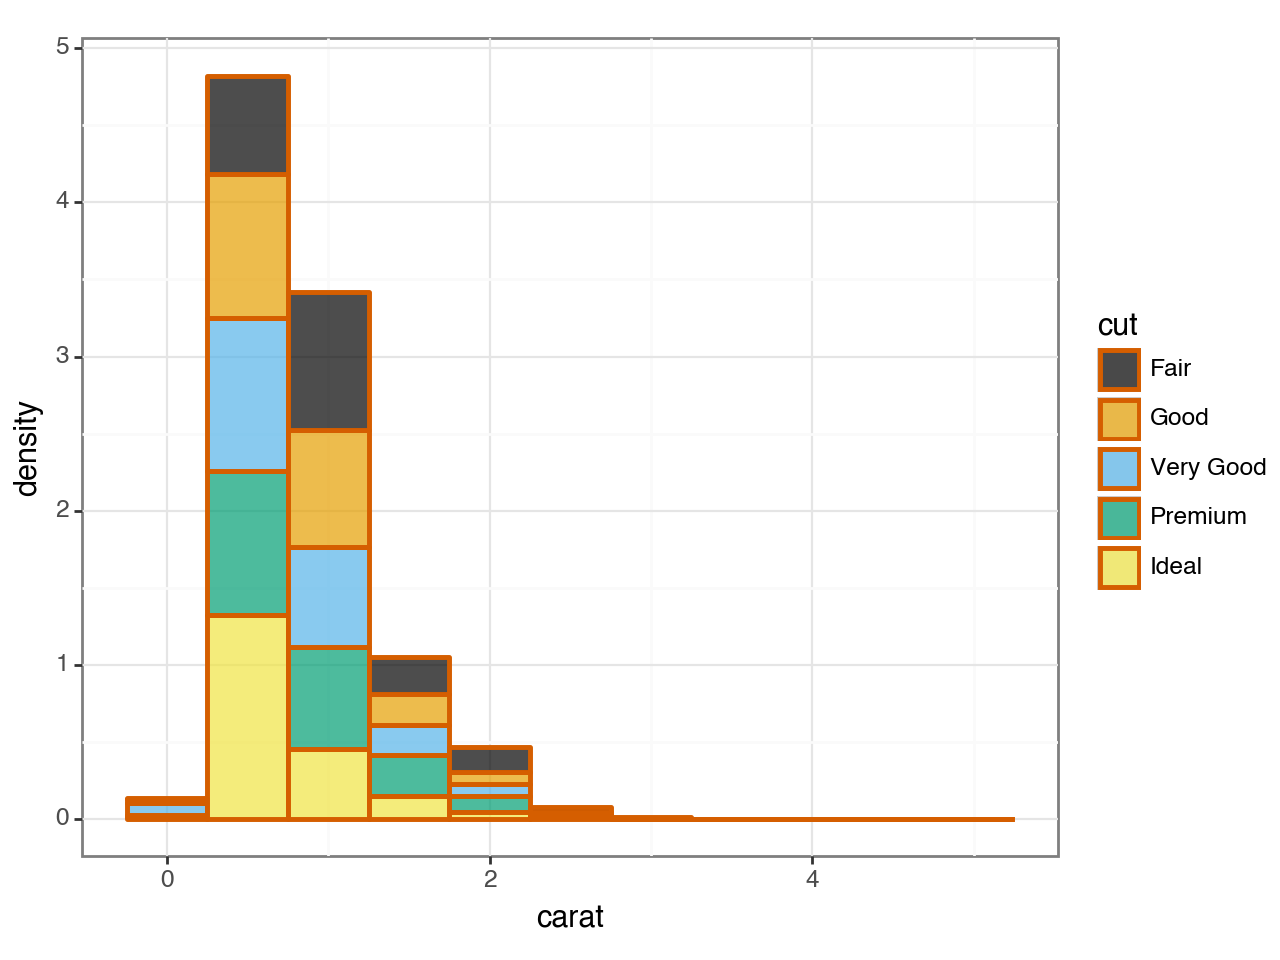

<Figure Size: (640 x 480)>

In [17]:
(
    ggplot(diamonds, aes(x='carat', 
                         y=after_stat('density'),
                         fill='cut'  # change the fill colour using another variable
                        ))
    + scale_fill_manual(values=["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442"]) # change the fill colour
    + geom_histogram(binwidth=0.5,
                    colour="#D55E00",# change the outline
                    size=1,          # change the thickness of the outline
                    alpha=0.7        # change the transparency 
                    )
    + theme_bw()                     # play with themes (look/arrangement)
)

When faceting histograms with scaled counts/densities, they are normalised by each facet, and not overall. Here's an example of a facet wrap:

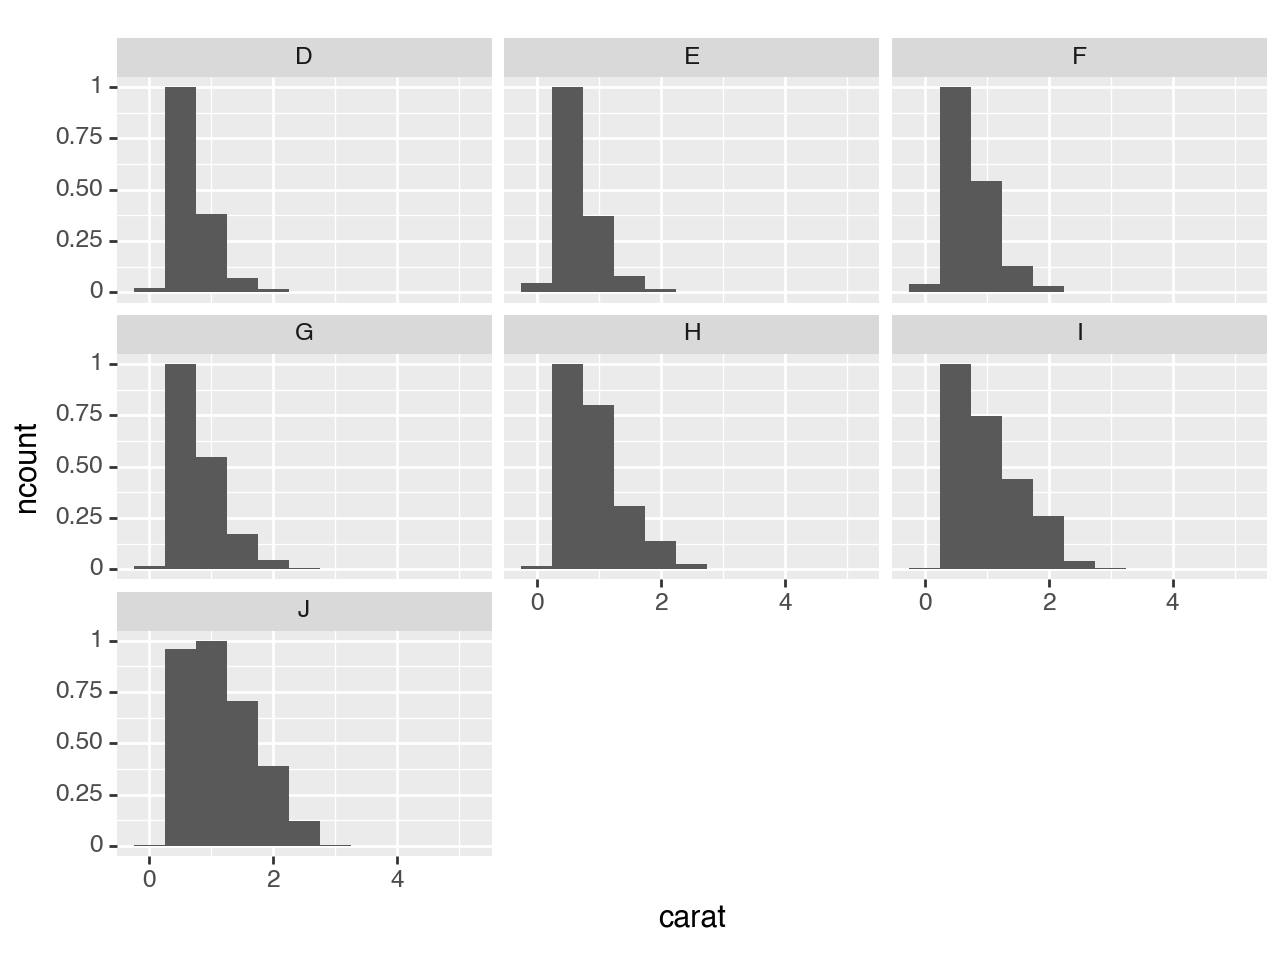

<Figure Size: (640 x 480)>

In [18]:
(
    ggplot(diamonds, aes(x='carat', y=after_stat('ncount'))) 
    + geom_histogram(binwidth=0.5)
    + facet_wrap('color') # facet wrap
)

Here's an example of a facet grid with the count normalised in each grid:

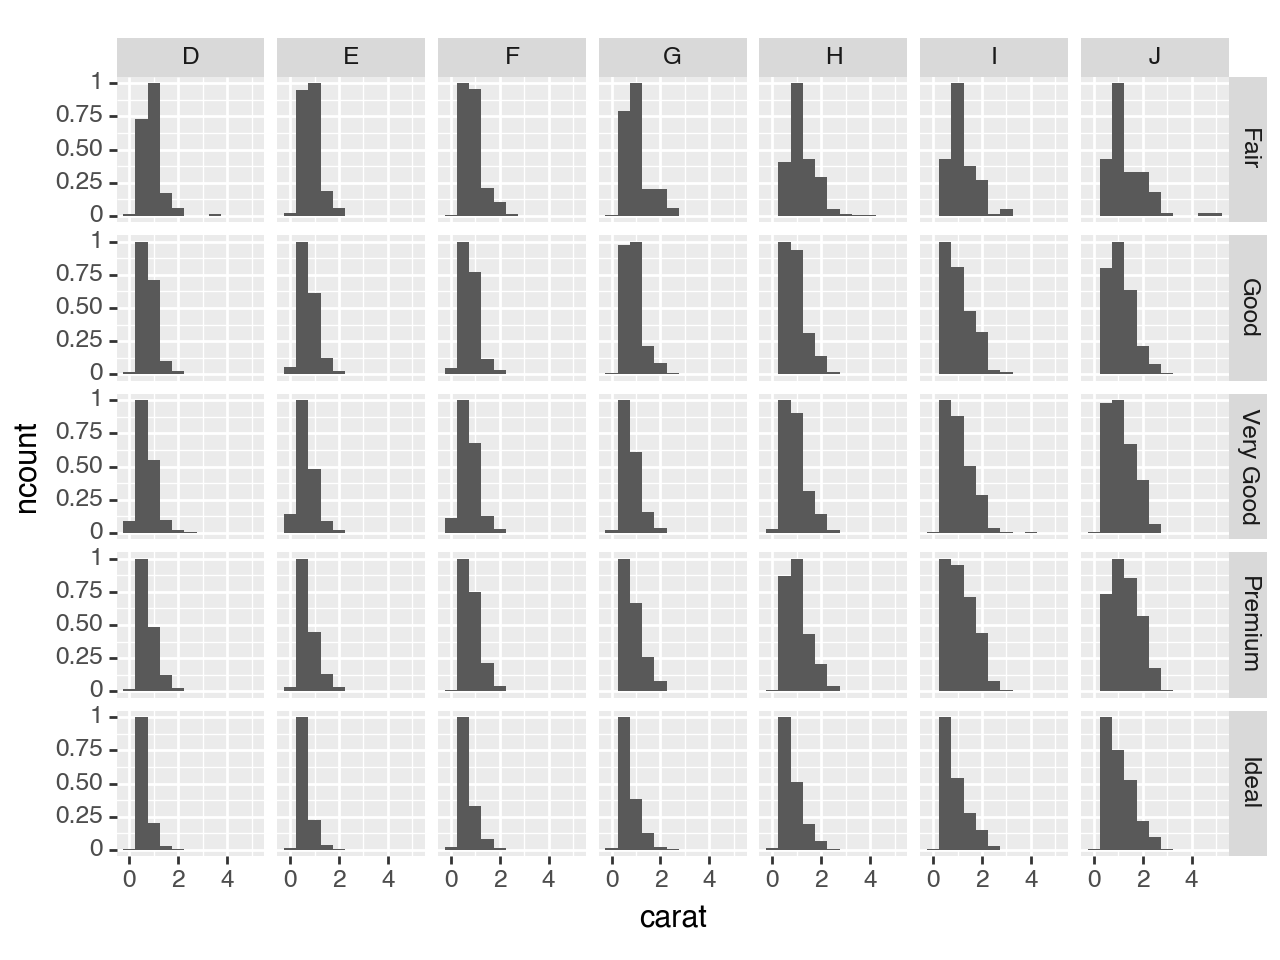

<Figure Size: (640 x 480)>

In [19]:
(
    ggplot(diamonds, aes(x='carat', y=after_stat('ncount'))) 
    + geom_histogram(binwidth=0.5)
    + facet_grid('cut ~ color')
)

Here is an example of adding the mean and median line to a histogram:

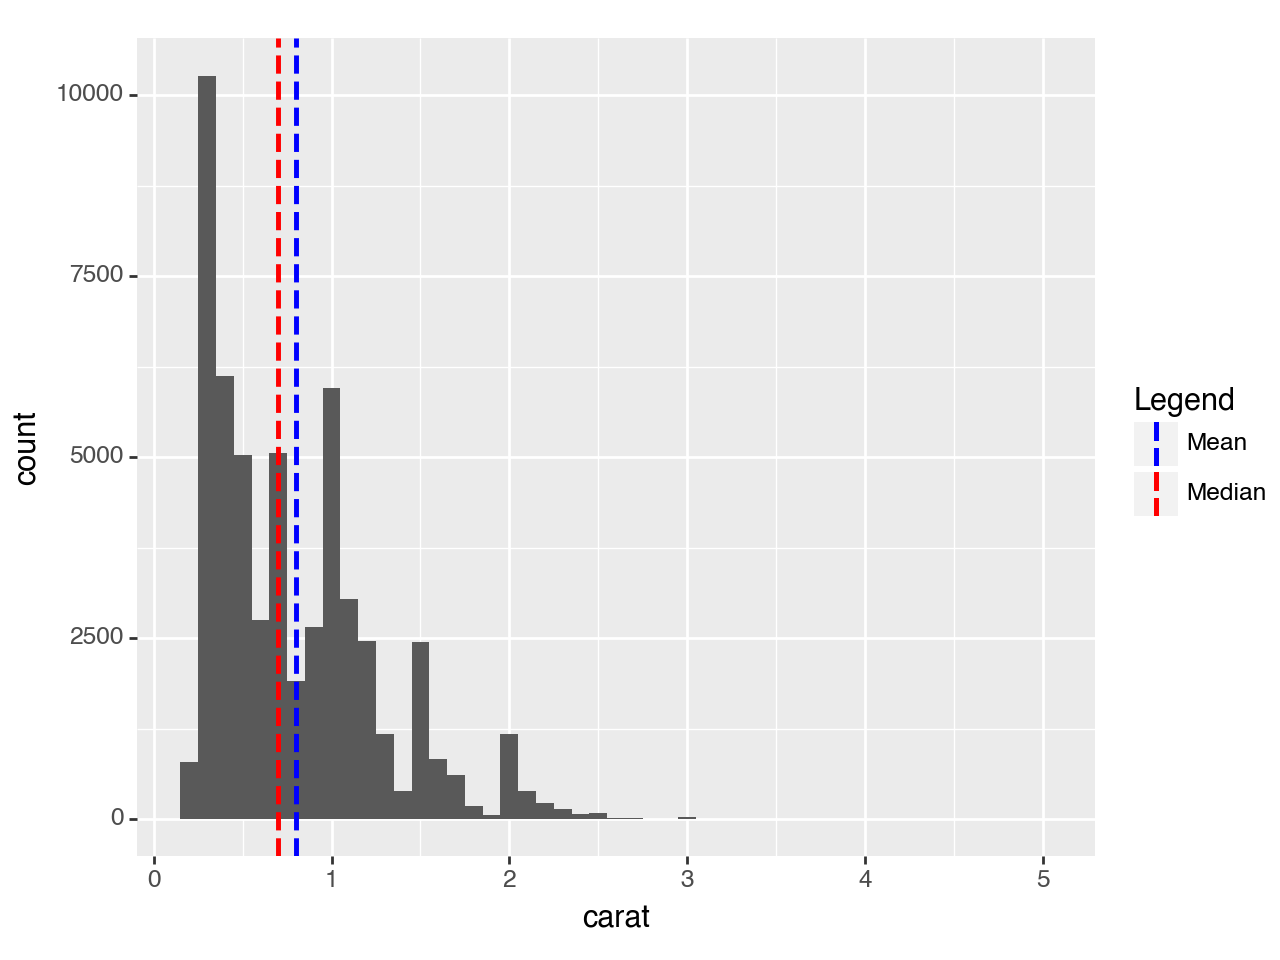

<Figure Size: (640 x 480)>

In [22]:
(
    ggplot(diamonds, aes(x='carat'))
        + geom_histogram(binwidth=0.1)
        + geom_vline(aes(xintercept=diamonds.carat.mean(), color='"Mean"'), linetype='dashed', size=1)
        + geom_vline(aes(xintercept=diamonds.carat.median(), color='"Median"'), linetype='dashed', size=1)
        + scale_color_manual(values={'Mean': 'blue', 'Median': 'red'})
        + labs(color='Legend')
)